In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
img1 = cv2.imread('/content/20240229_152153.jpg')
img2 = cv2.imread('/content/20240229_152210.jpg')

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


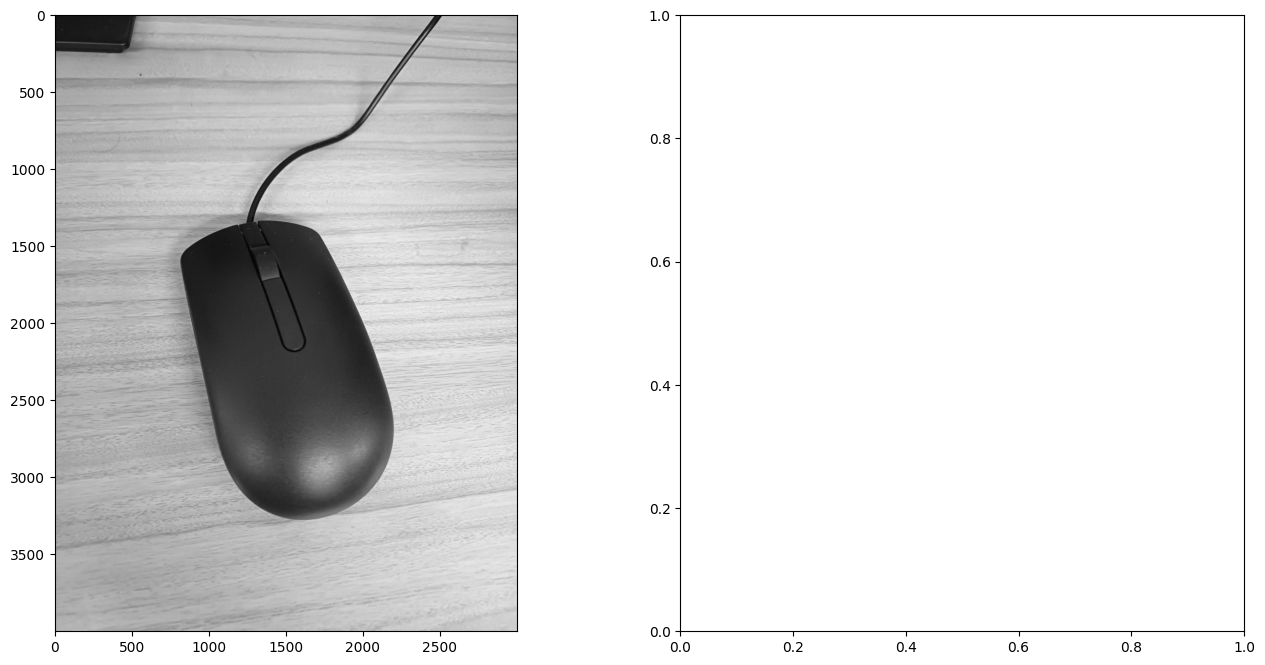

In [ ]:
figure, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(img1, cmap='gray')

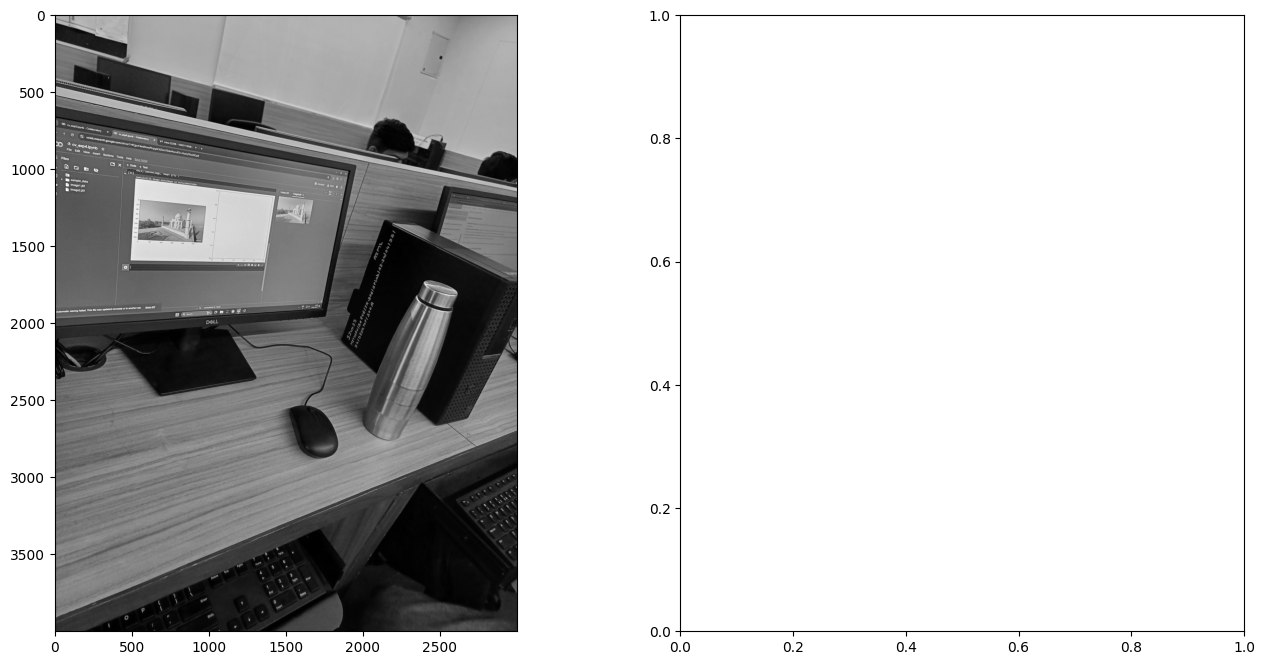

In [ ]:
figure, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(img2, cmap='gray')

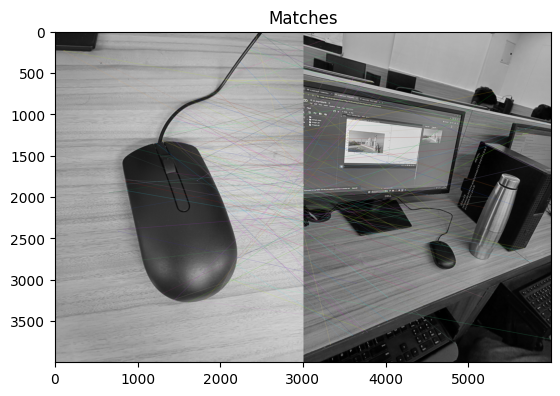

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key=lambda x: x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], None, flags=2)

plt.imshow(img3)
plt.title('Matches')
plt.show()

In [ ]:


descriptors_1 = descriptors_1.astype(np.uint8)
descriptors_2 = descriptors_2.astype(np.uint8)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(descriptors_1, descriptors_2)

matches = sorted(matches, key=lambda x: x.distance)

# Extract matched keypoints
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


registered_image = cv2.warpPerspective(img1, M, (img2.shape[1], img1.shape[0]))

cv2.imshow('Original Image', img1)
cv2.waitKey(0)

# Display the registered image
cv2.imshow('Registered Image', registered_image)
cv2.waitKey(0)

# Close all windows
cv2.destroyAllWindows()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
